# Decision Tree Problem 2

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

### Data Description:

Let’s consider a Company dataset with around 10 variables and 400 records. 


The attributes are as follows: 
- Sales -- Unit sales (in thousands) at each location
- Competitor Price -- Price charged by competitor at each location
- Income -- Community income level (in thousands of dollars)
- Advertising -- Local advertising budget for company at each location (in thousands of dollars)
- Population -- Population size in region (in thousands)
- Price -- Price company charges for car seats at each site
- Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
- Age -- Average age of the local population
- Education -- Education level at each location
- Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
- US -- A factor with levels No and Yes to indicate whether the store is in the US or not 

## Steps:

1. Import new data set
    - understand the dataset, look into it. 
    - add the new column fraud
    - perform EDA.
    - check data info and null values.
2. Visualisation
    - making pairplot graphs to better understand the data.   
3. Feature engineering
    - understand all features involeved.
    - list out features that needs to be considered in the model.
    - get dummies if required
    - Train | test spilliting
4. Decision Tree Classifier
    - Default Parameters
    - Evaluation
    - Visualize the tree
5. Report Model Results
6. Experimenting HyperParameters 
    - Max Depth
    - Max Leaf Nodes
    - Criterion
7. Building the Final Model
    - model report
    - Feature importance
8. Decision Tree Regressor
9. Conclusion

In [6]:
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

## Import New Dataset

In [7]:
raw_data = pd.read_csv("C:/Users/Admin/Documents/Assignments/Assignment 14/14Q2\\Company_Data.csv")
df = raw_data.copy()
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

<AxesSubplot:xlabel='Sales', ylabel='Count'>

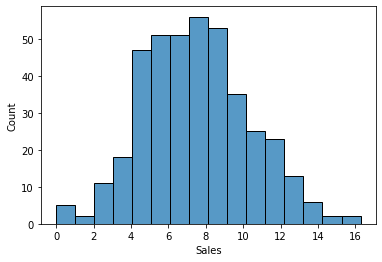

In [8]:
sns.histplot(df.Sales)
#We need to categorize this data using a mean threshold.
#Values greater than mean would indicate high sales and those lesser would be low sales.

In [9]:
#def func to assign fraud risky and good values

def filt(x):
    if x<= np.mean(df.Sales):
        return 'Low Sale'
    else: 
        return 'High Sale'

In [10]:
df['sales_cat'] = df['Sales'].copy()
df['sales_cat'] = df['sales_cat'].apply(filt)
df.pop('Sales')
df.head()

CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0        138      73           11         276    120       Bad   42   
1        111      48           16         260     83      Good   65   
2        113      35           10         269     80    Medium   59   
3        117     100            4         466     97    Medium   55   
4        141      64            3         340    128       Bad   38   

   Education Urban   US  sales_cat  
0         17   Yes  Yes  High Sale  
1         10   Yes  Yes  High Sale  
2         12   Yes  Yes  High Sale  
3         14   Yes  Yes   Low Sale  
4         13   Yes   No   Low Sale

In [11]:
df.sales_cat.value_counts()

Low Sale     201
High Sale    199
Name: sales_cat, dtype: int64

In [12]:
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 
df['Urban']= label_encoder.fit_transform(df['Urban']) 
df['US']= label_encoder.fit_transform(df['US']) 
df['sales_cat']= label_encoder.fit_transform(df['sales_cat'])

df.head()

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        138      73           11         276    120          0   42   
1        111      48           16         260     83          1   65   
2        113      35           10         269     80          2   59   
3        117     100            4         466     97          2   55   
4        141      64            3         340    128          0   38   

   Education  Urban  US  sales_cat  
0         17      1   1          0  
1         10      1   1          0  
2         12      1   1          0  
3         14      1   1          1  
4         13      1   0          1

In [13]:
df.sales_cat.value_counts()
#Low Sale = 1
#High Sale = 0

1    201
0    199
Name: sales_cat, dtype: int64

In [14]:
df.info() # No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    400 non-null    int64
 1   Income       400 non-null    int64
 2   Advertising  400 non-null    int64
 3   Population   400 non-null    int64
 4   Price        400 non-null    int64
 5   ShelveLoc    400 non-null    int32
 6   Age          400 non-null    int64
 7   Education    400 non-null    int64
 8   Urban        400 non-null    int32
 9   US           400 non-null    int32
 10  sales_cat    400 non-null    int32
dtypes: int32(4), int64(7)
memory usage: 28.2 KB


In [15]:
df.describe()

CompPrice      Income  Advertising  Population       Price  \
count  400.000000  400.000000   400.000000  400.000000  400.000000   
mean   124.975000   68.657500     6.635000  264.840000  115.795000   
std     15.334512   27.986037     6.650364  147.376436   23.676664   
min     77.000000   21.000000     0.000000   10.000000   24.000000   
25%    115.000000   42.750000     0.000000  139.000000  100.000000   
50%    125.000000   69.000000     5.000000  272.000000  117.000000   
75%    135.000000   91.000000    12.000000  398.500000  131.000000   
max    175.000000  120.000000    29.000000  509.000000  191.000000   

        ShelveLoc         Age   Education       Urban          US  sales_cat  
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.00000  
mean     1.307500   53.322500   13.900000    0.705000    0.645000    0.50250  
std      0.833475   16.200297    2.620528    0.456614    0.479113    0.50062  
min      0.000000   25.000000   10.000000    0.000000    0.000000    0.00000  
25%      1.000000   39.750000   12.000000    0.000000    0.000000    0.00000  
50%      2.000000   54.500000   14.000000    1.000000    1.000000    1.00000  
75%      2.000000   66.000000   16.000000    1.000000    1.000000    1.00000  
max      2.000000   80.000000   18.000000    1.000000    1.000000    1.00000

## Visualization

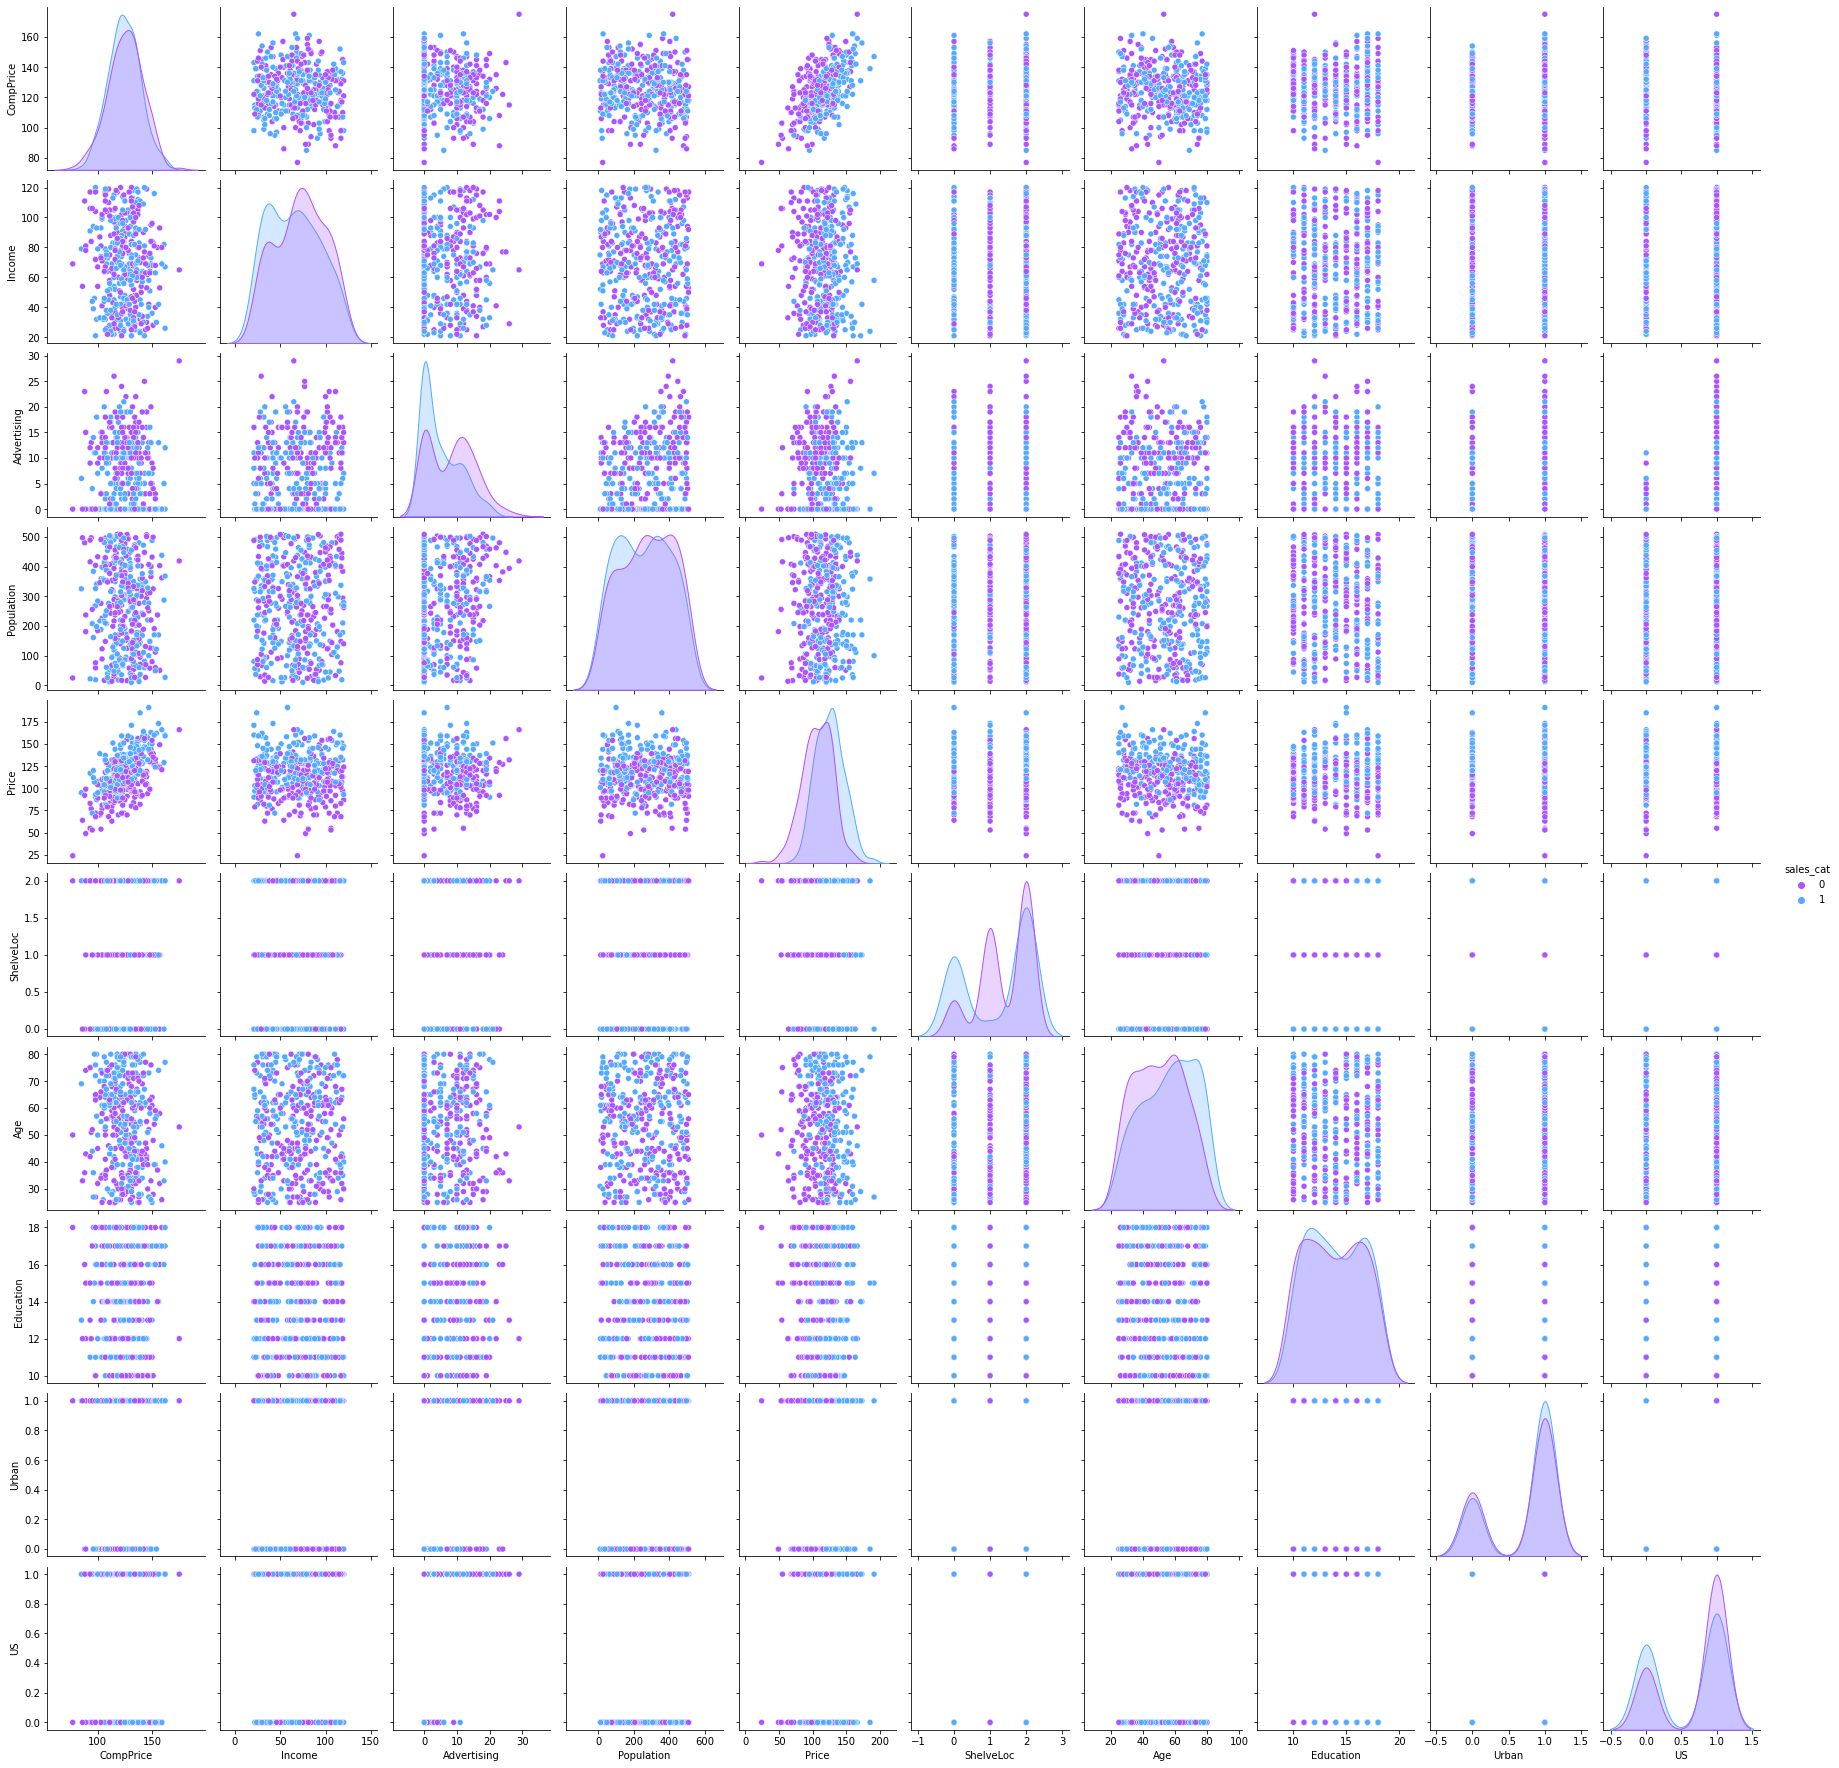

In [16]:
sns.pairplot(df,hue='sales_cat',palette='cool_r')

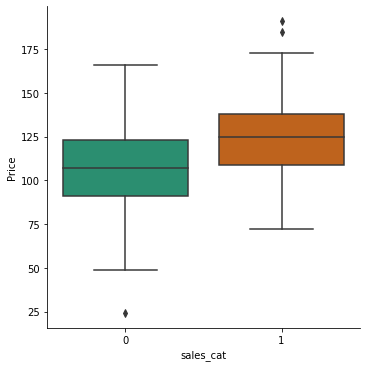

In [17]:
sns.catplot(x='sales_cat',y='Price',data=df,kind='box',palette='Dark2')

## Feature Engineering

All the features in the dataset are relevant and can be used for model training.
There are no dummies in the dataset.

### Train and Test Split data

In [18]:
X = df.iloc[:,:-1]
y =df.sales_cat

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Decision Tree Classifier
### Default Parameters

In [20]:
model = DecisionTreeClassifier() 

In [21]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
base_pred = model.predict(X_test)

### Evaluation

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [24]:
confusion_matrix(y_test,base_pred) #There are number of false values

array([[37, 23],
       [11, 49]], dtype=int64)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


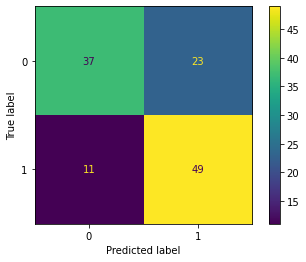

In [25]:
plot_confusion_matrix(model,X_test,y_test)

In [26]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.77      0.62      0.69        60
           1       0.68      0.82      0.74        60

    accuracy                           0.72       120
   macro avg       0.73      0.72      0.71       120
weighted avg       0.73      0.72      0.71       120



In [27]:
model.feature_importances_

array([0.16005519, 0.06889015, 0.06559205, 0.06902434, 0.29826745,
       0.1514269 , 0.14180718, 0.04493673, 0.        , 0.        ])

In [28]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']) 
#good dependence on Price, CompPrice, Shelveloc segments
#Least dependence on Urban and US segments

Feature Importance
CompPrice              0.160055
Income                 0.068890
Advertising            0.065592
Population             0.069024
Price                  0.298267
ShelveLoc              0.151427
Age                    0.141807
Education              0.044937
Urban                  0.000000
US                     0.000000

### Visualizing the tree

In [29]:
from sklearn.tree import plot_tree

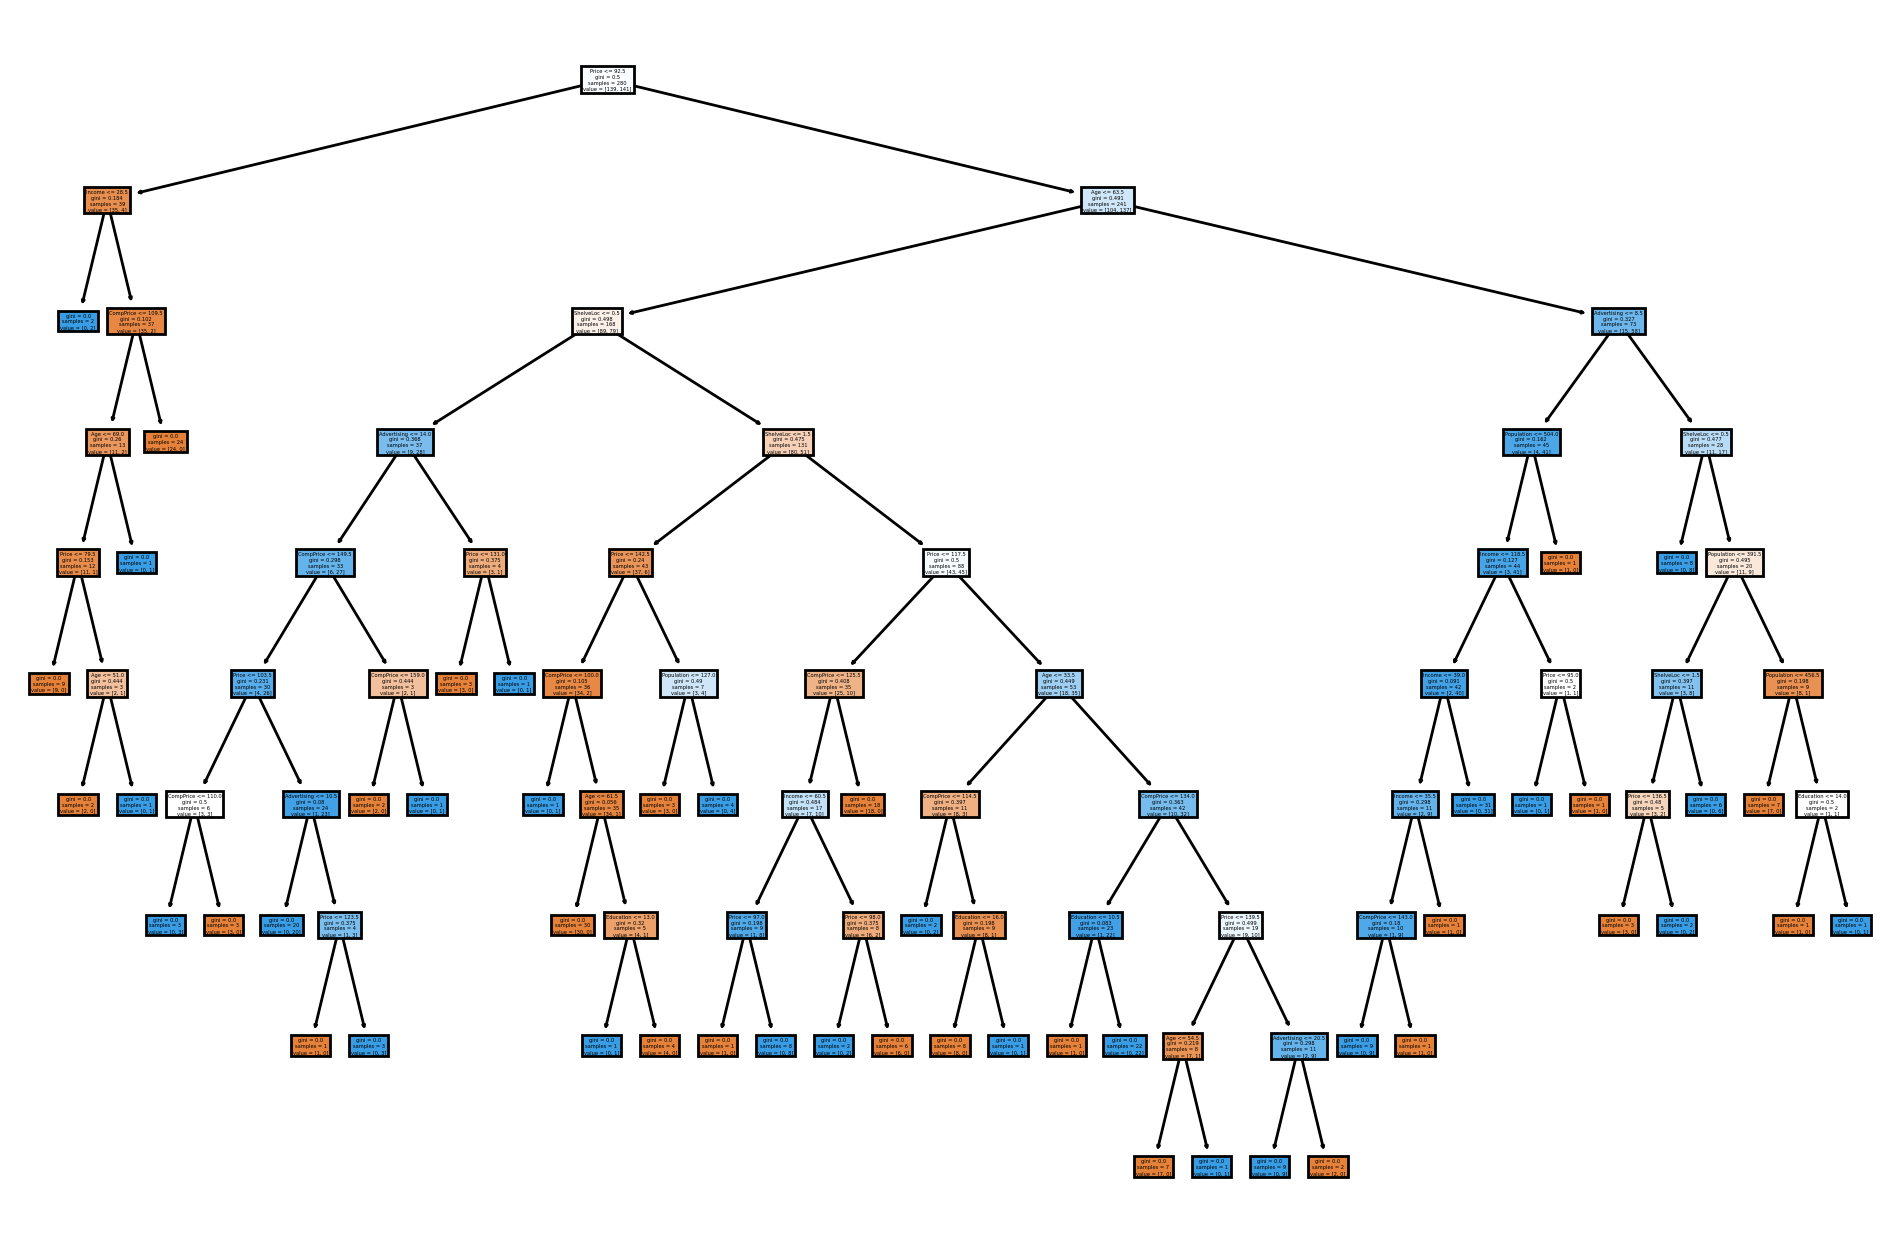

In [31]:
plt.figure(figsize=(12,8), dpi = 200)
plot_tree(model,filled=True,feature_names=X.columns);

#Note that criterion by default is Gini (CART)
#The tree is very large to make any good interpretations

## Reporting Model Results

In [32]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(20,20),dpi=200)
    plot_tree(model,filled=True,feature_names=X.columns);

## Experimenting with HyperParameters

### Max Depth

In [33]:
#Using max depth
trimmed_tree = DecisionTreeClassifier(max_depth=5)
trimmed_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

              precision    recall  f1-score   support

           0       0.74      0.58      0.65        60
           1       0.66      0.80      0.72        60

    accuracy                           0.69       120
   macro avg       0.70      0.69      0.69       120
weighted avg       0.70      0.69      0.69       120





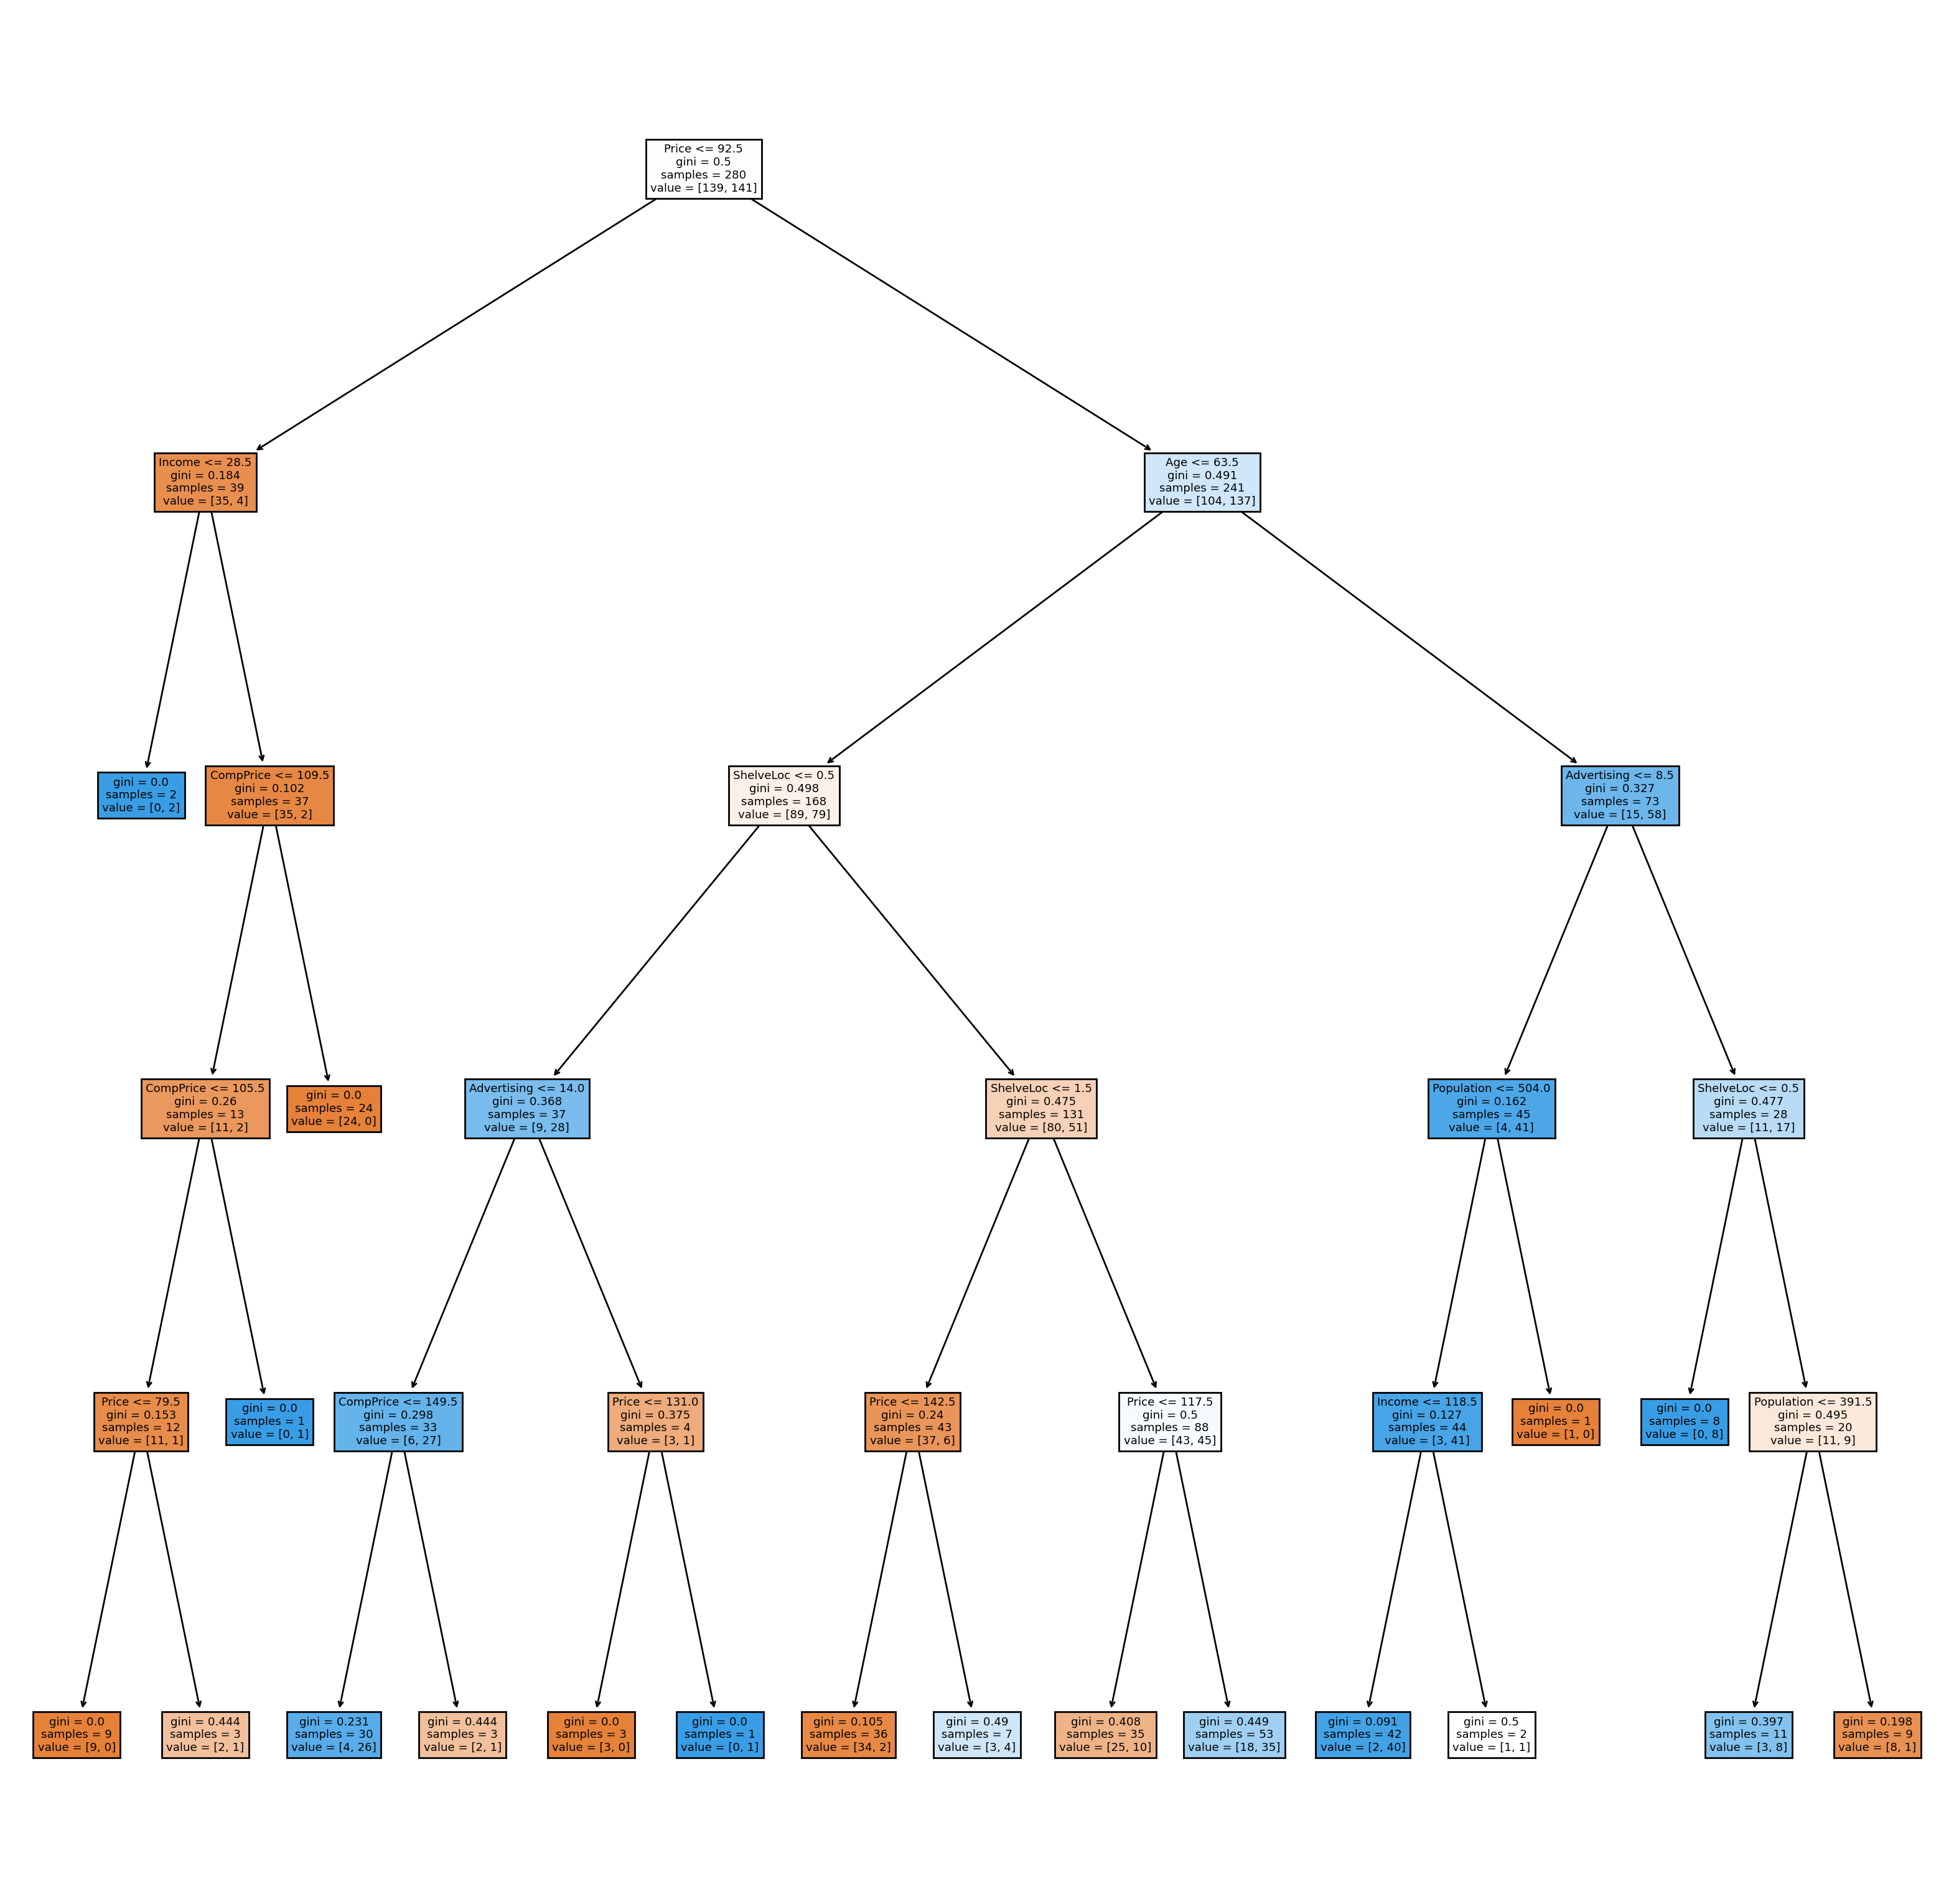

In [34]:
report_model(trimmed_tree) 

              precision    recall  f1-score   support

           0       0.78      0.60      0.68        60
           1       0.68      0.83      0.75        60

    accuracy                           0.72       120
   macro avg       0.73      0.72      0.71       120
weighted avg       0.73      0.72      0.71       120





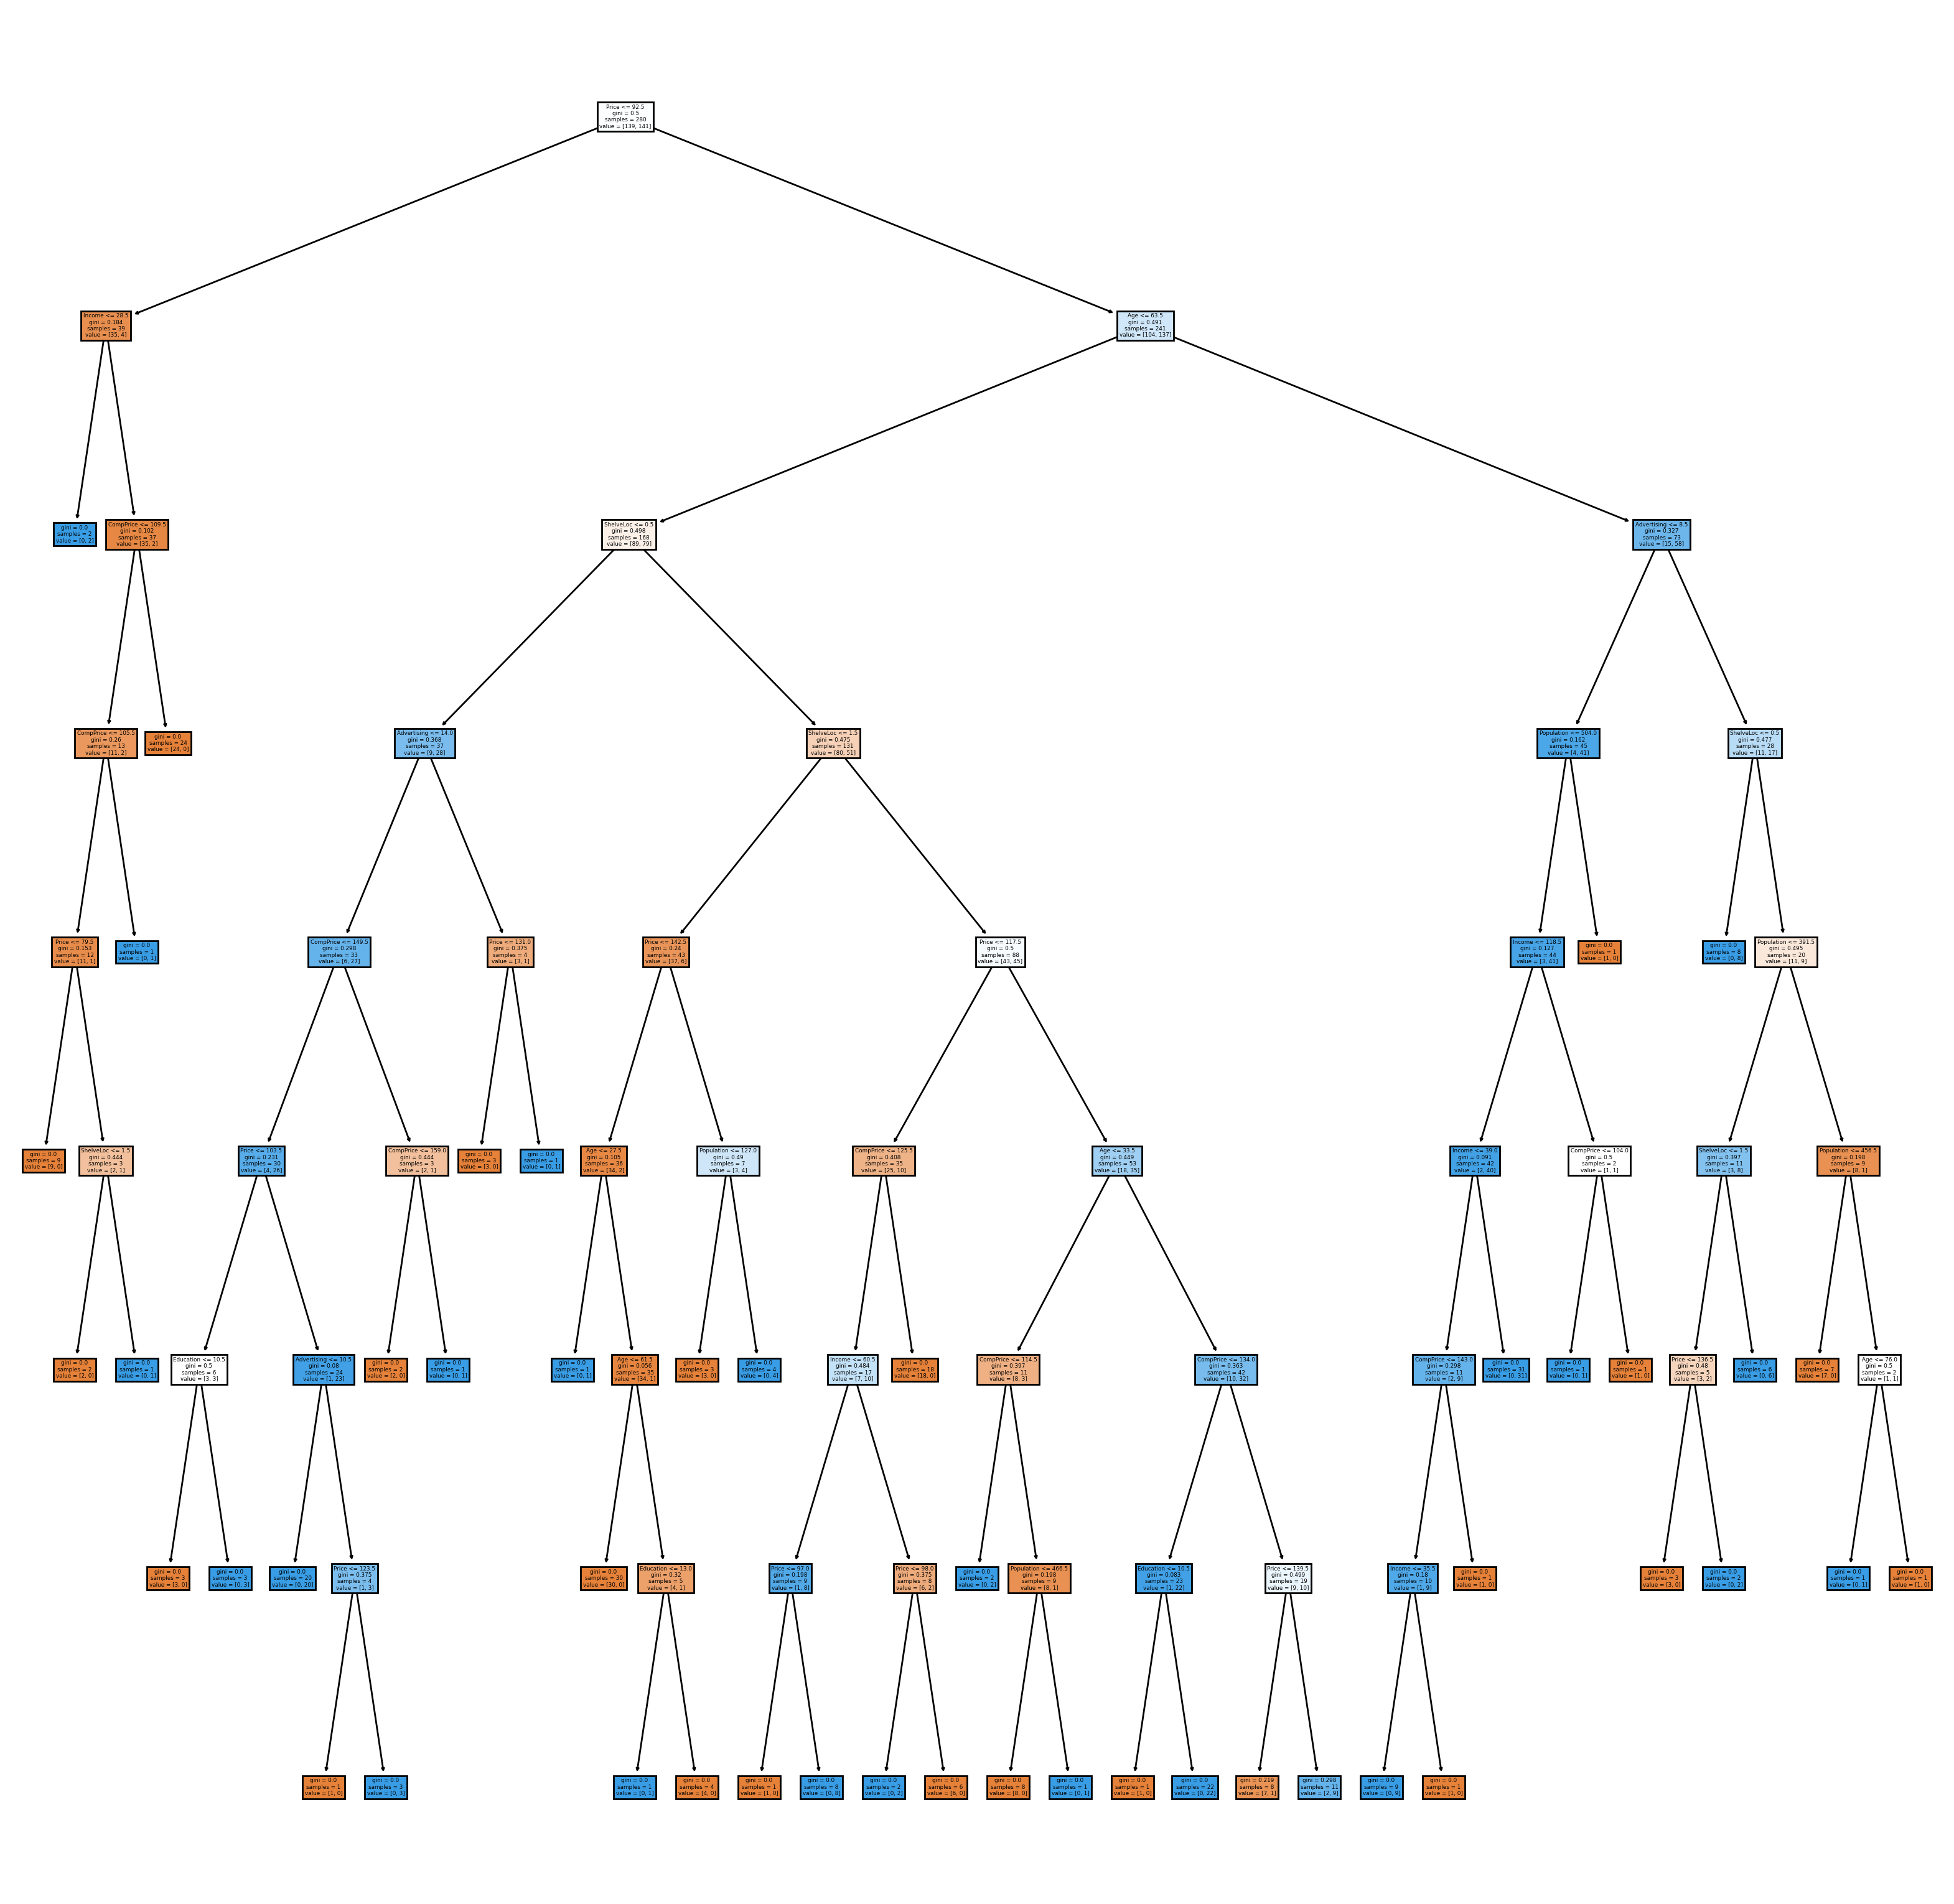

In [35]:
#Using max depth
trimmed_tree = DecisionTreeClassifier(max_depth=8)
trimmed_tree.fit(X_train,y_train)
report_model(trimmed_tree) #going beyond 8 is not advisable

### Max Leaf Nodes

In [36]:
## Experimenting with max leaf nodes
trim2_tree = DecisionTreeClassifier(max_leaf_nodes=10)
trim2_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

              precision    recall  f1-score   support

           0       0.78      0.60      0.68        60
           1       0.68      0.83      0.75        60

    accuracy                           0.72       120
   macro avg       0.73      0.72      0.71       120
weighted avg       0.73      0.72      0.71       120





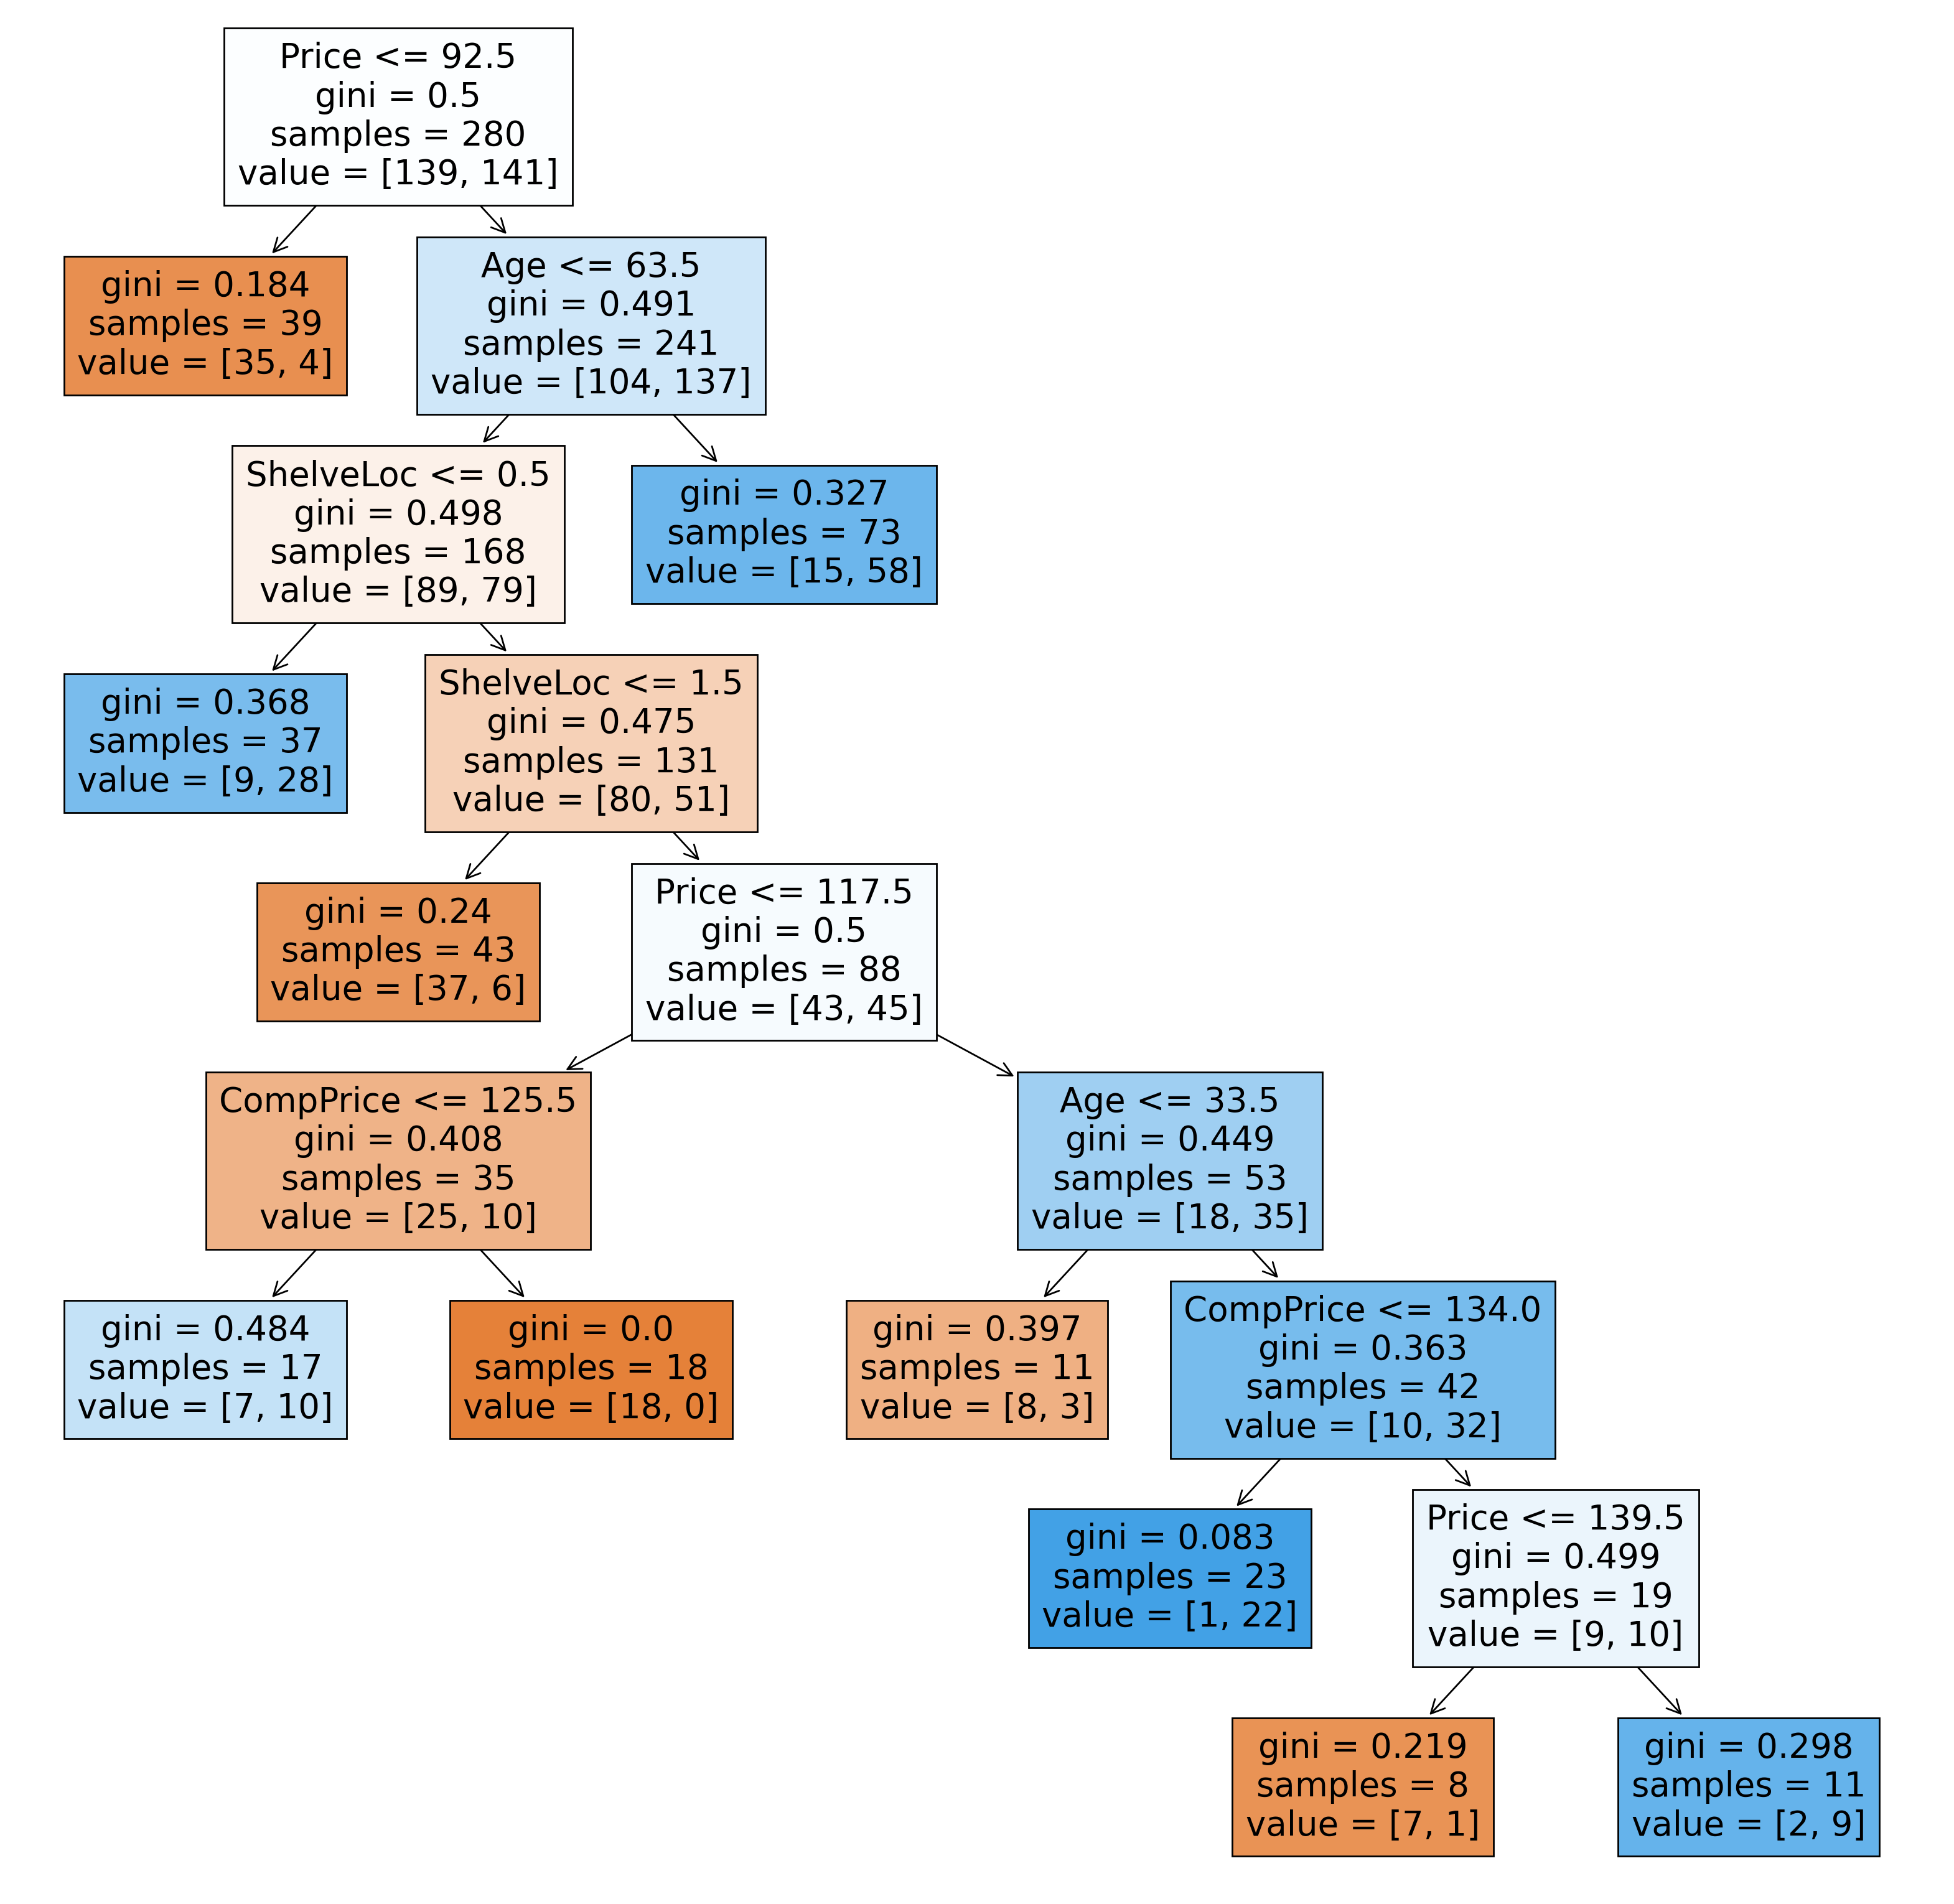

In [37]:
report_model(trim2_tree) 

              precision    recall  f1-score   support

           0       0.76      0.75      0.76        60
           1       0.75      0.77      0.76        60

    accuracy                           0.76       120
   macro avg       0.76      0.76      0.76       120
weighted avg       0.76      0.76      0.76       120





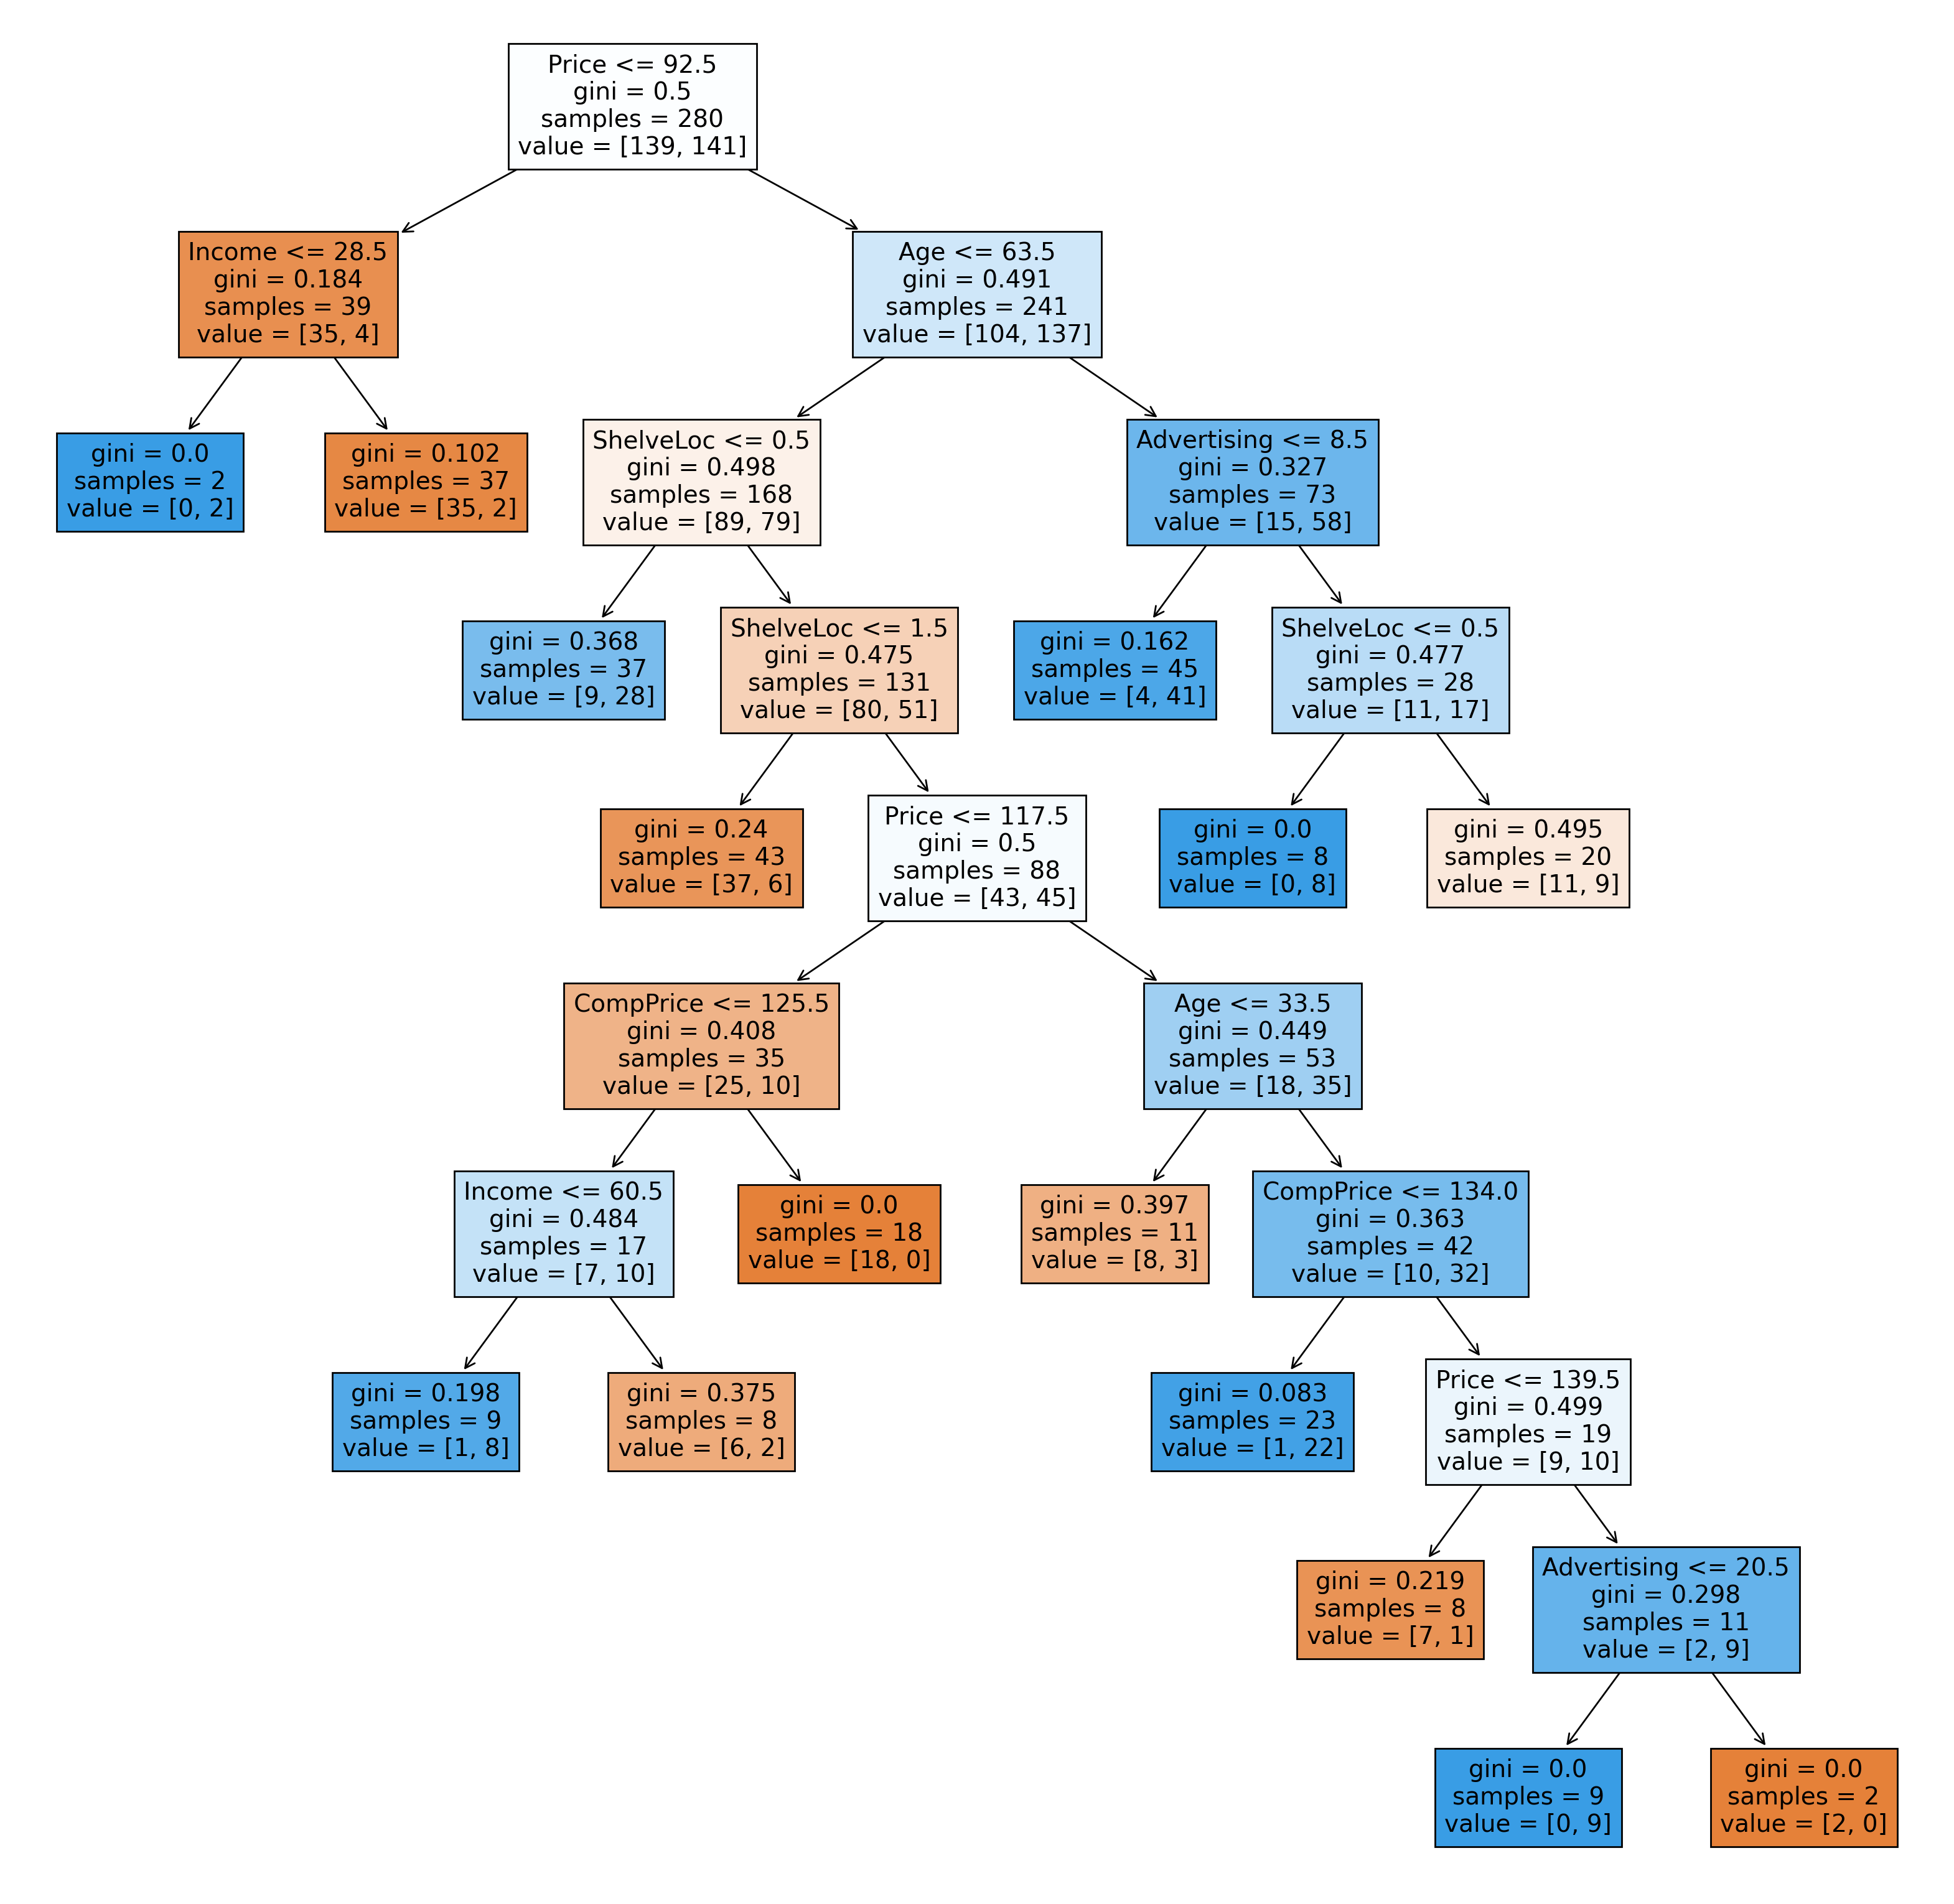

In [38]:
## Experimenting with max leaf nodes
trim2_tree = DecisionTreeClassifier(max_leaf_nodes=15)
trim2_tree.fit(X_train,y_train)
report_model(trim2_tree) #max values at 15

### Entropy Critera

In [39]:
#Experimenting with crtieria C.50
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       0.72      0.63      0.67        60
           1       0.67      0.75      0.71        60

    accuracy                           0.69       120
   macro avg       0.69      0.69      0.69       120
weighted avg       0.69      0.69      0.69       120





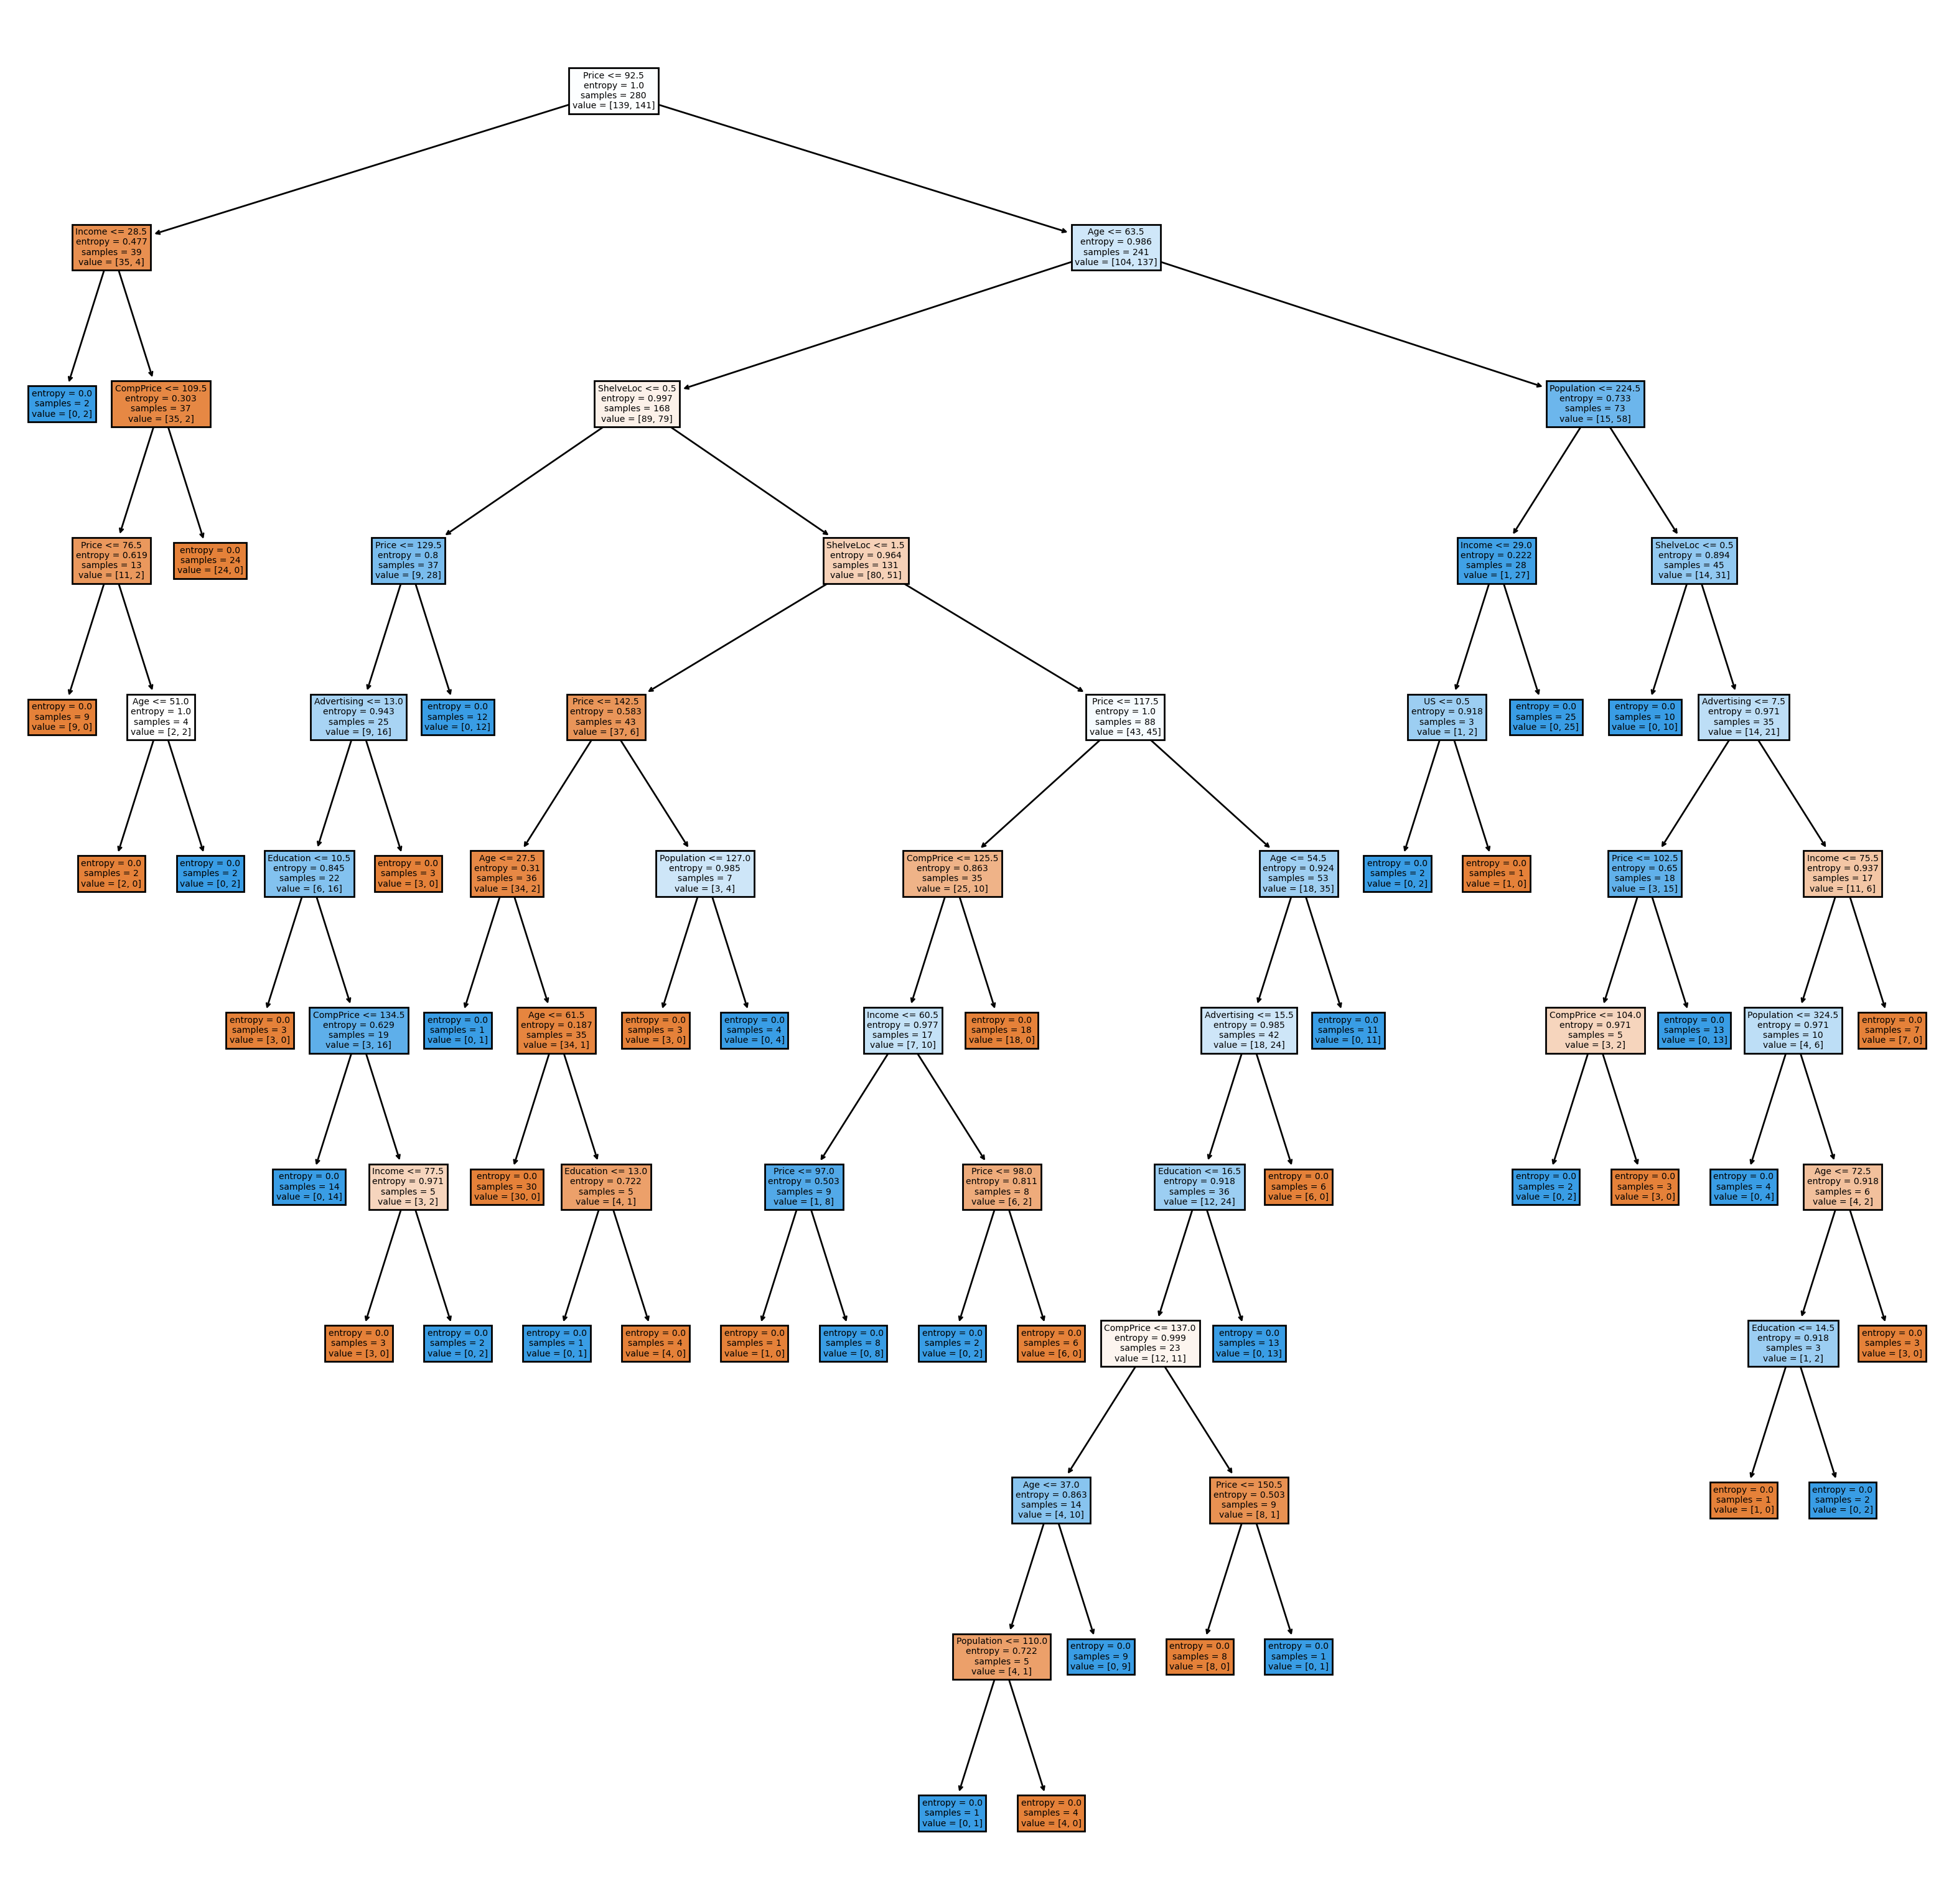

In [40]:
report_model(entropy_tree) #entropy values are visible

## Building Final Model

In [41]:
fnl_model =  DecisionTreeClassifier(max_depth=8, max_leaf_nodes=14)

In [42]:
fnl_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=14)

              precision    recall  f1-score   support

           0       0.76      0.75      0.76        60
           1       0.75      0.77      0.76        60

    accuracy                           0.76       120
   macro avg       0.76      0.76      0.76       120
weighted avg       0.76      0.76      0.76       120





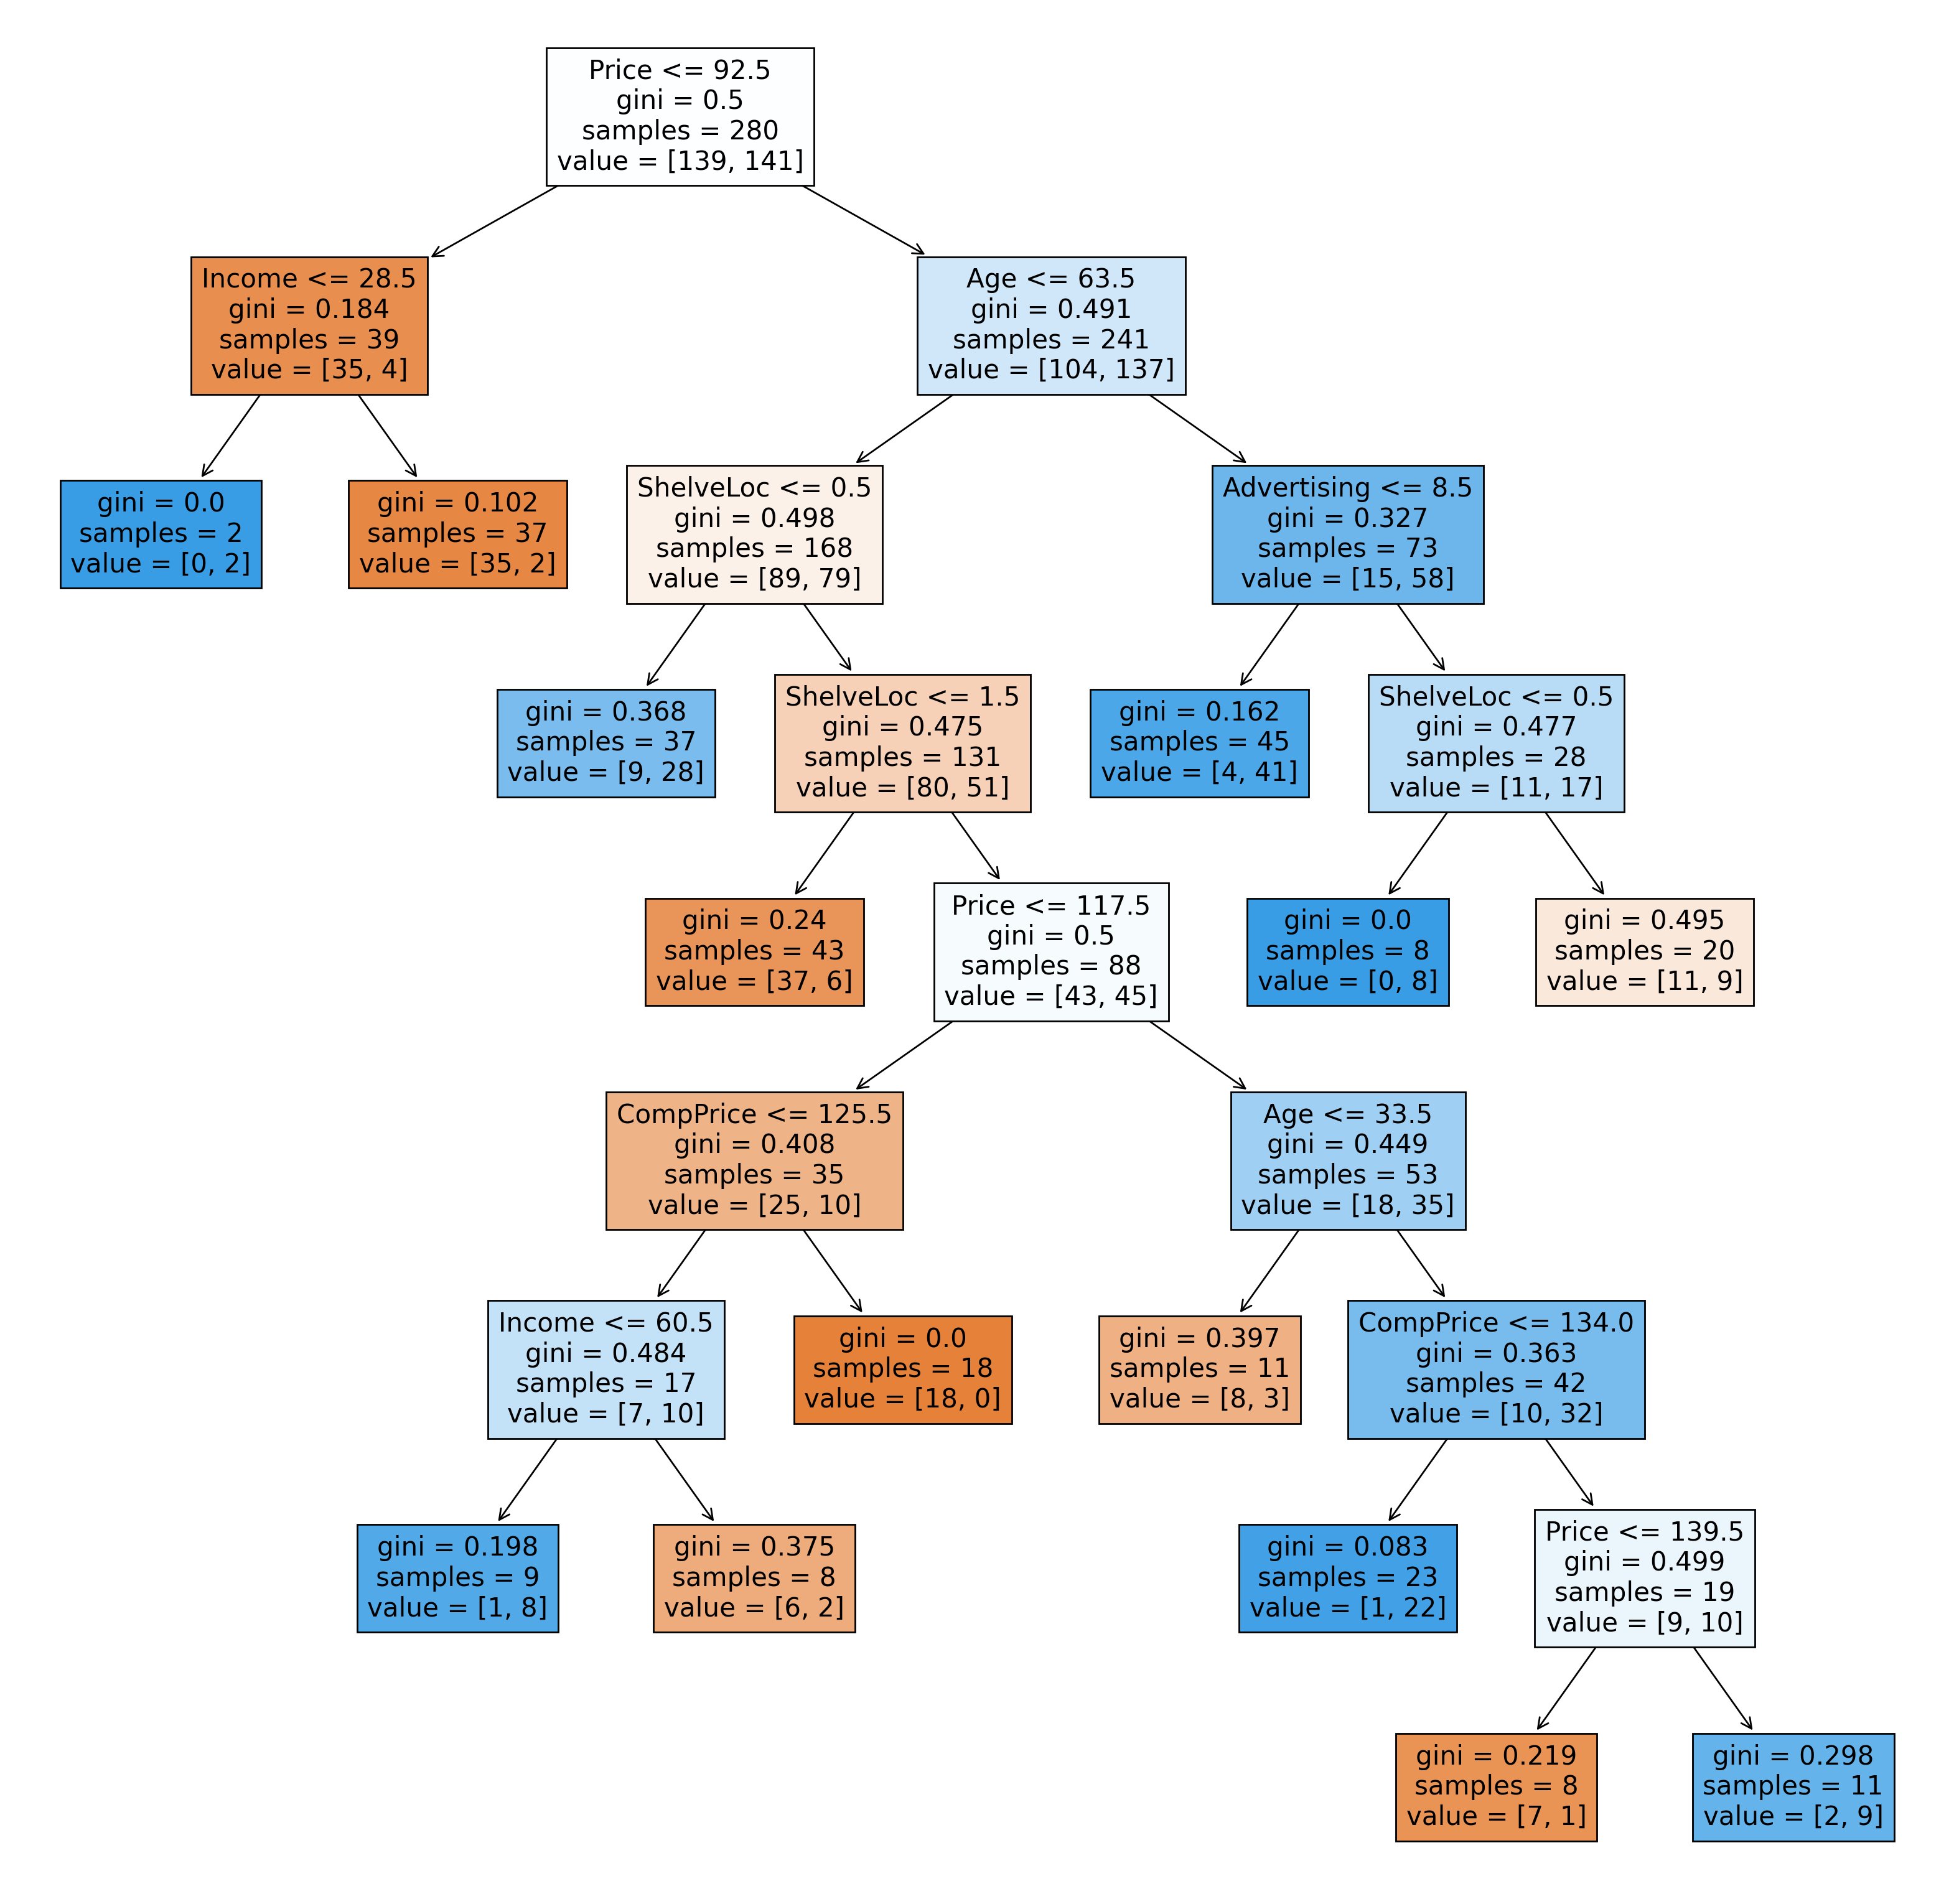

In [43]:
report_model(fnl_model) #By far the best model that could be developed.

In [44]:
fnl_model.feature_importances_

array([0.12534575, 0.08675423, 0.04037664, 0.        , 0.31573372,
       0.24349458, 0.18829508, 0.        , 0.        , 0.        ])

In [45]:
pd.DataFrame(index=X.columns,data=fnl_model.feature_importances_,columns=['Feature Importance']) 
#Good dependence on Price, CompPrice, Shelveloc and Age segments
#Least dependence on Urban, US segments and Education Segments

Feature Importance
CompPrice              0.125346
Income                 0.086754
Advertising            0.040377
Population             0.000000
Price                  0.315734
ShelveLoc              0.243495
Age                    0.188295
Education              0.000000
Urban                  0.000000
US                     0.000000

## Decision Tree Regressor
### Default Parameters

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
base_pred2 = model2.predict(X_test)

In [38]:
confusion_matrix(y_test,base_pred2)

array([[38, 22],
       [11, 49]], dtype=int64)

In [39]:
print(classification_report(y_test,base_pred2))

              precision    recall  f1-score   support

           0       0.78      0.63      0.70        60
           1       0.69      0.82      0.75        60

    accuracy                           0.73       120
   macro avg       0.73      0.72      0.72       120
weighted avg       0.73      0.72      0.72       120



## Conclusion

- Decision tree with different parameters have been tried out and the best possible outcomes have been obtained.
- Feature importance of our final model reveals the segments that contribute to high/Low sales.
- Good dependence on Price, CompPrice, Shelveloc and Age segments.
- Least dependence on Urban, US and Education Segments.